In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [2]:
zoo = pd.read_csv('zoo.csv')
zoo.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [3]:
name = pd.read_csv('class.csv')
name

,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"frog, frog, newt, toad"
5,6,8,Bug,"flea, gnat, honeybee, housefly, ladybird, moth..."
6,7,10,Invertebrate,"clam, crab, crayfish, lobster, octopus, scorpi..."


In [4]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
animal_name    101 non-null object
hair           101 non-null int64
feathers       101 non-null int64
eggs           101 non-null int64
milk           101 non-null int64
airborne       101 non-null int64
aquatic        101 non-null int64
predator       101 non-null int64
toothed        101 non-null int64
backbone       101 non-null int64
breathes       101 non-null int64
venomous       101 non-null int64
fins           101 non-null int64
legs           101 non-null int64
tail           101 non-null int64
domestic       101 non-null int64
catsize        101 non-null int64
class_type     101 non-null int64
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [11]:
zoo.isnull().any().sum()

0

In [5]:
zoo.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [6]:
zoo.describe(include='object')

,animal_name
count,101
unique,100
top,frog
freq,2


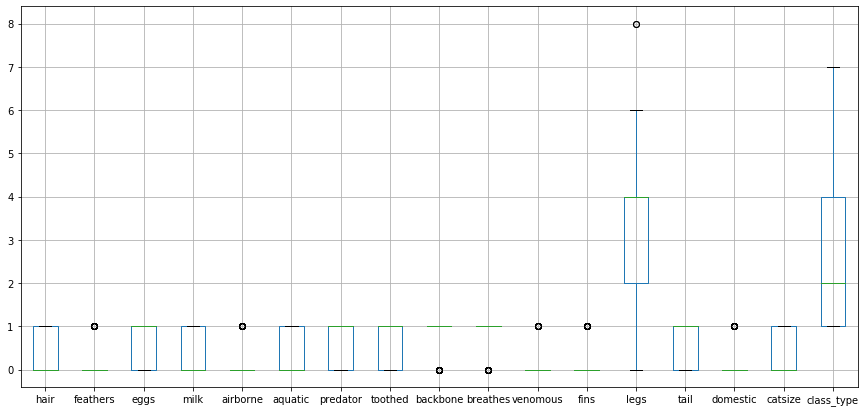

In [7]:
plt.figure(figsize=(15,7))
zoo.boxplot()

In [8]:
list(zoo.animal_name.value_counts().index)
# unusual that there are 2 instances of "frog" and one of "girl"!

['frog',
 'octopus',
 'opossum',
 'kiwi',
 'slug',
 'honeybee',
 'parakeet',
 'calf',
 'lion',
 'fruitbat',
 'clam',
 'toad',
 'carp',
 'deer',
 'puma',
 'haddock',
 'vole',
 'duck',
 'wasp',
 'crab',
 'bass',
 'worm',
 'giraffe',
 'polecat',
 'housefly',
 'elephant',
 'pike',
 'antelope',
 'lobster',
 'tuatara',
 'goat',
 'sole',
 'dove',
 'penguin',
 'crayfish',
 'porpoise',
 'chub',
 'dolphin',
 'lynx',
 'vulture',
 'flamingo',
 'swan',
 'gorilla',
 'pheasant',
 'wren',
 'raccoon',
 'skimmer',
 'vampire',
 'gnat',
 'lark',
 'hamster',
 'seasnake',
 'sealion',
 'ostrich',
 'sparrow',
 'tuna',
 'mongoose',
 'hawk',
 'reindeer',
 'rhea',
 'wallaby',
 'wolf',
 'scorpion',
 'skua',
 'newt',
 'mink',
 'catfish',
 'stingray',
 'ladybird',
 'seawasp',
 'mole',
 'cavy',
 'pony',
 'slowworm',
 'chicken',
 'cheetah',
 'pussycat',
 'squirrel',
 'aardvark',
 'boar',
 'bear',
 'platypus',
 'girl',
 'crow',
 'dogfish',
 'seal',
 'gull',
 'moth',
 'starfish',
 'piranha',
 'pitviper',
 'oryx',
 'leo

In [9]:
labels = dict(enumerate(name.Animal_Names))
labels

{0: 'aardvark, antelope, bear, boar, buffalo, calf, cavy, cheetah, deer, dolphin, elephant, fruitbat, giraffe, girl, goat, gorilla, hamster, hare, leopard, lion, lynx, mink, mole, mongoose, opossum, oryx, platypus, polecat, pony, porpoise, puma, pussycat, raccoon, reindeer, seal, sealion, squirrel, vampire, vole, wallaby, wolf',
 1: 'chicken, crow, dove, duck, flamingo, gull, hawk, kiwi, lark, ostrich, parakeet, penguin, pheasant, rhea, skimmer, skua, sparrow, swan, vulture, wren',
 2: 'pitviper, seasnake, slowworm, tortoise, tuatara',
 3: 'bass, carp, catfish, chub, dogfish, haddock, herring, pike, piranha, seahorse, sole, stingray, tuna',
 4: 'frog, frog, newt, toad',
 5: 'flea, gnat, honeybee, housefly, ladybird, moth, termite, wasp',
 6: 'clam, crab, crayfish, lobster, octopus, scorpion, seawasp, slug, starfish, worm'}

In [10]:
for k,v in labels.items():
    print(k, len(v))
# imbalanced dataset

0 323
1 148
2 47
3 99
4 22
5 61
6 79


In [12]:
X = zoo.drop(columns=['animal_name', 'class_type'])
y = zoo.class_type

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [13]:
k_range = range(1,26)
scores = {}
scores_list = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores[k] = accuracy_score(y_test, y_pred)
    scores_list.append(accuracy_score(y_test, y_pred))

In [14]:
scores

{1: 1.0,
 2: 0.9523809523809523,
 3: 0.9523809523809523,
 4: 0.9047619047619048,
 5: 0.8571428571428571,
 6: 0.8571428571428571,
 7: 0.8571428571428571,
 8: 0.7619047619047619,
 9: 0.7619047619047619,
 10: 0.7619047619047619,
 11: 0.7619047619047619,
 12: 0.7619047619047619,
 13: 0.7619047619047619,
 14: 0.7619047619047619,
 15: 0.7619047619047619,
 16: 0.7619047619047619,
 17: 0.7619047619047619,
 18: 0.7142857142857143,
 19: 0.6190476190476191,
 20: 0.6190476190476191,
 21: 0.6190476190476191,
 22: 0.6190476190476191,
 23: 0.6190476190476191,
 24: 0.6190476190476191,
 25: 0.6190476190476191}

Text(0, 0.5, 'Testing Accuracy')

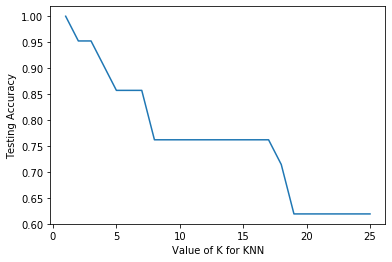

In [15]:
plt.plot(k_range, scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

K value 1 got the highest accuracy. 

In [17]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)
y_pred = knn.predict(X_test)

In [18]:
y_test.values

array([2, 1, 6, 2, 1, 6, 7, 1, 2, 1, 2, 4, 6, 5, 7, 2, 7, 1, 1, 1, 7])

In [19]:
y_pred

array([2, 1, 6, 2, 1, 6, 7, 1, 2, 1, 2, 4, 6, 5, 7, 2, 7, 1, 1, 1, 7])

Question: is there problem of overfitting? <br/>
Answer: the model is trained with full dataset, of coz all correct🤪 (silly me)

In [20]:
zoo.iloc[0].values

array(['aardvark', 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 4, 0, 0, 1, 1],
      dtype=object)

In [28]:
#hair	feathers	eggs	milk	airborne	aquatic	predator	toothed	backbone	breathes	venomous	fins	legs	tail	domestic	catsize
new_x = [[0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 8, 0, 0, 1]]   # random new data
y_predict = knn.predict(new_x)
y_predict

array([7])

In [26]:
dict(zip(name.Class_Number,name.Class_Type))

{1: 'Mammal',
 2: 'Bird',
 3: 'Reptile',
 4: 'Fish',
 5: 'Amphibian',
 6: 'Bug',
 7: 'Invertebrate'}

In [27]:
classes = dict(zip(name.Class_Number,name.Class_Type))
classes[y_predict[0]]

'Invertebrate'